# P.2 Load Custom data(Images) and Process

This notebook using Dataset from Kaggle Competition and can be downloaded from given link

https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

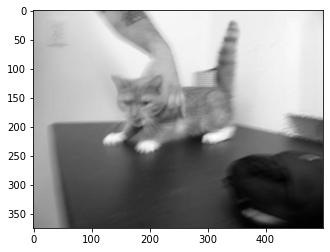

In [2]:
DATADIR = r'C:\Python\Udemy\Custom Notebooks\Machine Learning\Sentdex  - Neural Networks\kagglecatsanddogs\PetImages'
CATEGORIES = ['Cat', 'Dog']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)   # path to cat or dog directory
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # grayscale will reduce the size of image compared to RGB
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

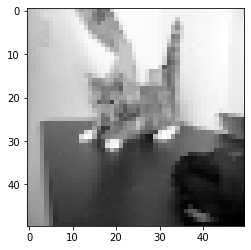

In [3]:
# Check the image size and convert all images to same size

IMG_SIZE = 50

new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(new_img_array, cmap='gray')
plt.show()

In [4]:
# create training data

IMG_SIZE = 50
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)   # path to cat or dog directory
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # grayscale will reduce the size of image compared to RGB
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))    # resize the images to 50x50 pixels
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [5]:
print(len(training_data))

24946


In [6]:
# shuffle the dataset since the original was prepared from the directory listing

import random

random.shuffle(training_data)

In [7]:
# confirm the data shuffling

for data in training_data[:10]:
        print(data[1])

0
0
0
1
1
1
0
1
1
0


In [8]:
# seperate features and labels from training data

X = []
y = []

for feature, label in training_data:
    X.append(feature)
    y.append(label)

In [9]:
X[0]

array([[249, 249, 252, ..., 210, 207, 217],
       [248, 245, 226, ..., 201, 206, 207],
       [240, 232, 233, ..., 201, 206, 204],
       ...,
       [250, 250, 250, ...,  68,  62,  55],
       [250, 248, 250, ...,  72,  65,  56],
       [250, 247, 250, ..., 114, 115, 106]], dtype=uint8)

In [10]:
# Convert 2D array to 1D array(VEctorization)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [11]:
X.shape

(24946, 50, 50, 1)

In [12]:
# save the dataset for future use

import pickle

pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
# read data from pickle file

pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y.pickle', 'rb')
y = pickle.load(pickle_in)
pickle_in.close()